<a href="https://colab.research.google.com/github/DeniseYuki/-Data-Science-analise-e-visualiza-o-de-dado/blob/main/Introdu%C3%A7%C3%A3o_a_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
print(sns.__version__)

0.13.1


#**Aula 2:Explore dados com exploratory data analysis**

#**Analisando as notas em geral**

In [3]:
import pandas as pd


In [5]:
notas = pd.read_csv("/content/ratings.csv")

In [ ]:
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [10]:
notas["nota"].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [11]:
notas["nota"].value_counts()

,count
nota,
4.0,26818
3.0,20047
5.0,13211
3.5,13136
4.5,8551
2.0,7551
2.5,5550
1.0,2811
1.5,1791


In [13]:
notas.nota.mean()
notas.nota.median()

3.5

In [14]:
print("media", notas.nota.mean())
print("mediana", notas.nota.median())

media 3.501556983616962
mediana 3.5


<Axes: ylabel='Frequency'>

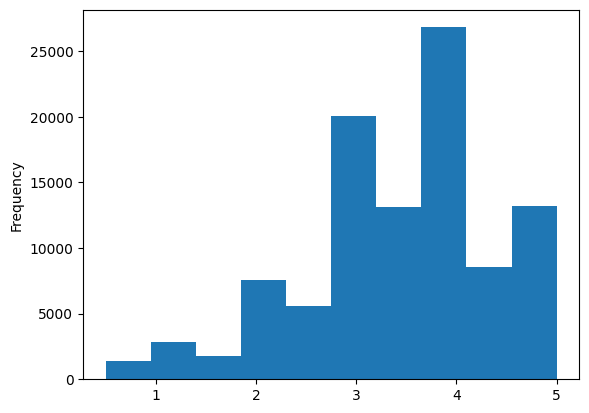

In [12]:
notas.nota.plot(kind="hist")

In [15]:
notas.nota.describe()

,nota
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


<Axes: xlabel='nota'>

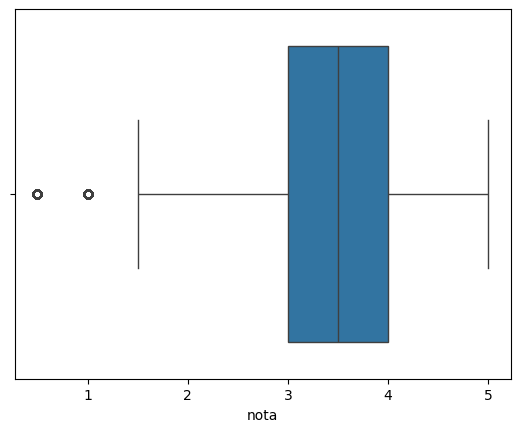

In [22]:
sns.boxplot(notas.nota, orient="h")


# Olhando os filmes

In [23]:
filmes = pd.read_csv("/content/movies.csv")
filmes.columns = ["filmeId", "titulo", "generos"]
filmes.head()

,filmeId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


#**Analisando algumas notas especificas por filme**

In [28]:
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [29]:
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [33]:
notas.groupby("filmeId").nota.mean()


,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


In [34]:
medias_por_filme = notas.groupby("filmeId").nota.mean()
medias_por_filme

,nota
filmeId,
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429
...,...
193581,4.000000
193583,3.500000
193585,3.500000


<Axes: ylabel='Frequency'>

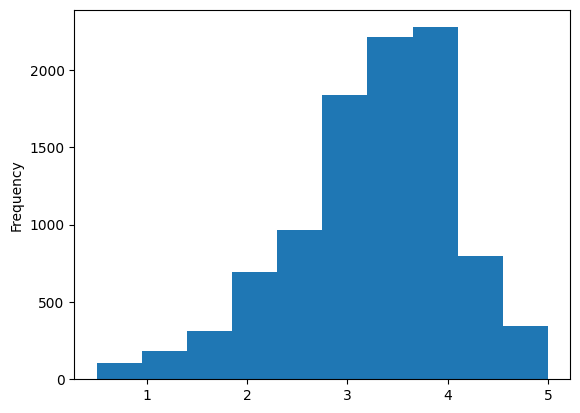

In [35]:
medias_por_filme.plot(kind="hist")

<Axes: xlabel='nota'>

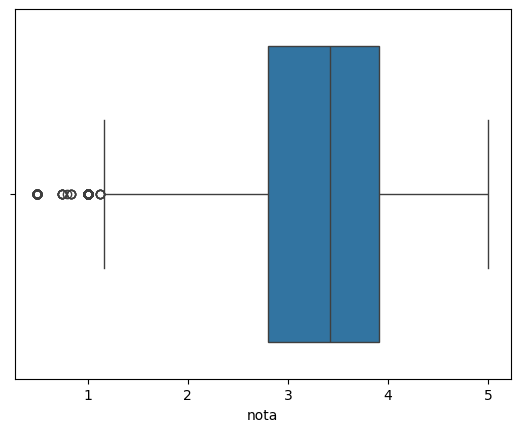

In [39]:
sns.boxplot(medias_por_filme, orient="h")

In [40]:
medias_por_filme.describe()

,nota
count,9724.000000
mean,3.262448
std,0.869874
min,0.500000
25%,2.800000
50%,3.416667
75%,3.911765
max,5.000000


<ipython-input-41-5bf8cca2d6c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme, bins=10)


<Axes: xlabel='nota', ylabel='Density'>

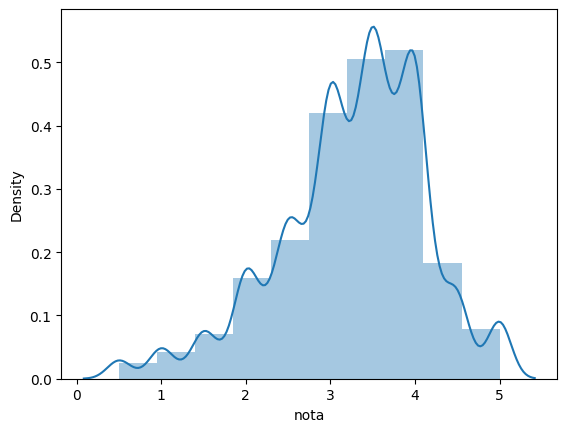

In [41]:
sns.distplot(medias_por_filme, bins=10)

<ipython-input-42-c99e5fbcf4e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(medias_por_filme)


<Axes: xlabel='nota', ylabel='Density'>

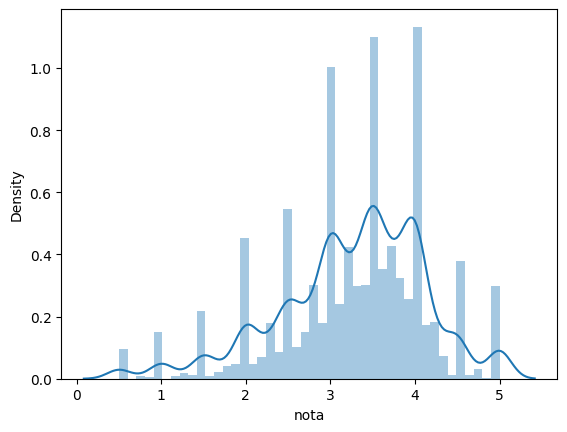

In [42]:
sns.distplot(medias_por_filme)

Text(0, 0.5, 'Frequência')

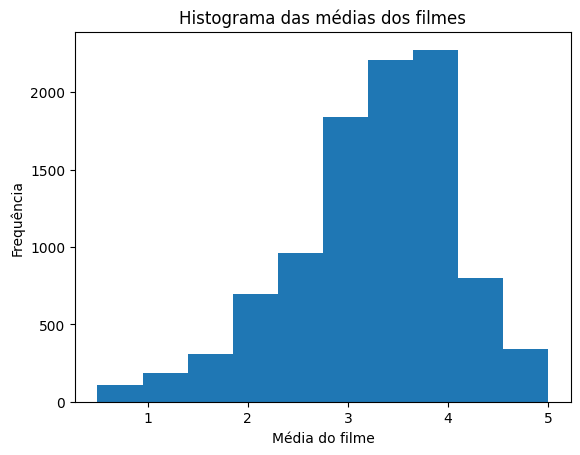

In [44]:
import matplotlib.pyplot as plt
plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")
plt.xlabel("Média do filme")
plt.ylabel("Frequência")

Modificando o tamanho do bloxplot

<Figure size 500x800 with 0 Axes>

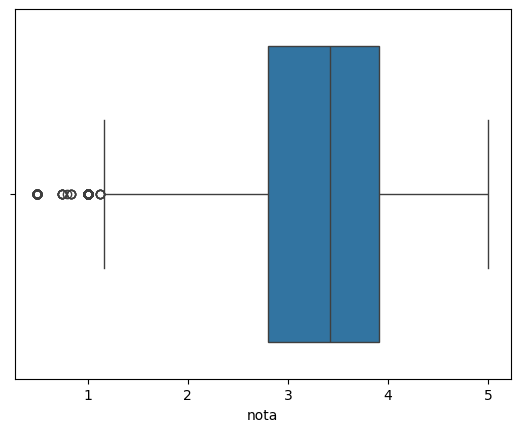

<Figure size 500x800 with 0 Axes>

In [47]:
sns.boxplot(medias_por_filme, orient="h")
plt.figure(figsize=(5,8))

Resumindo, essa aula foi uma exploração de dados no nosso conjunto de dados.

#**Aula 3 : Conheça os tipos de variáveis**

In [49]:
tmdb=pd.read_csv("/content/tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


1-verificar os tipos de linguas

In [50]:
tmdb.original_language.unique() # categorial nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

Categoria ordinal (tem ordem)

1.   1º lugar
2.   2º lugar
1.   3º lugar
2.   4º lugar









In [ ]:
#budget => orcamento => quantitativa continuo

In [ ]:
# quantidade de votos => 1,2,3,4,....números naturais (quantitativa discretas)

#**Aula 4: Entenda o papel de visualizações como histogramas e boxplots (Data visualization)**

In [58]:
tmdb.original_language.value_counts()


,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [76]:
#contagem_de_lingua = tmdb.original_language.value_counts().to_frame()


In [83]:
contagem_de_lingua = tmdb.original_language.value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ["original_language", "total"]
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


<Axes: xlabel='lingua original', ylabel='total'>

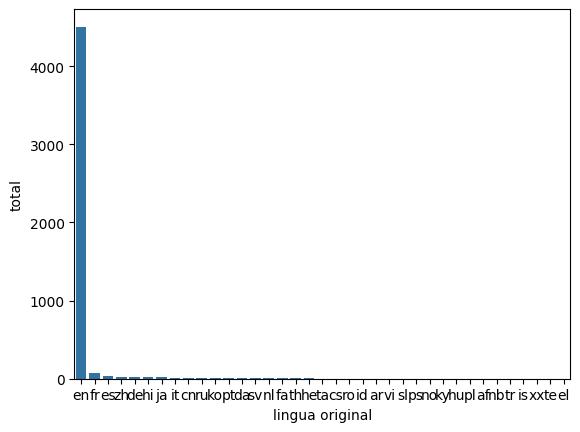

In [80]:
sns.barplot(x="lingua original", y="total", data=contagem_de_lingua)

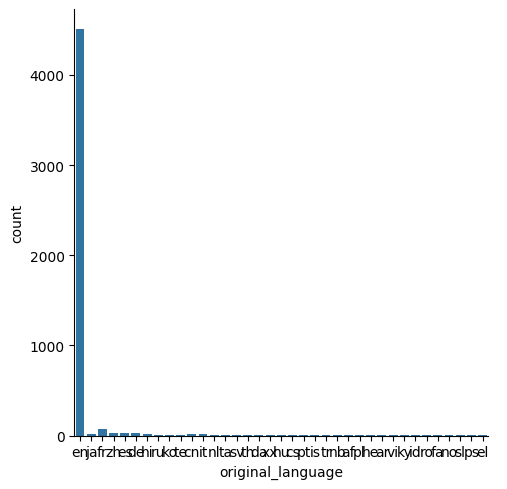

In [84]:
sns.catplot(x="original_language", kind="count", data=tmdb) #não está ordenado

Passando uma mensagem através de visualização

([<matplotlib.patches.Wedge at 0x7ada81776cb0>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

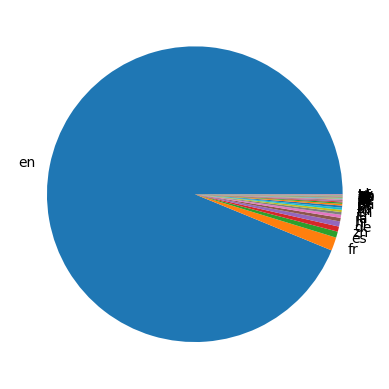

In [86]:
plt.pie(contagem_de_lingua["total"], labels=contagem_de_lingua["original_language"]) #não recomendado

In [90]:
total_por_lingua = tmdb["original_language"].value_counts()
total_por_lingua

,count
original_language,
en,4505
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12


In [93]:
total_de_ingles =total_por_lingua.loc["en"]
total_geral = total_por_lingua.sum()
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [97]:
dados = {'lingua': ["ingles", "outros"], "total": [total_de_ingles, total_do_resto]}
dados


{'lingua': ['ingles', 'outros'], 'total': [4505, 298]}

In [98]:
dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


<Axes: xlabel='lingua', ylabel='total'>

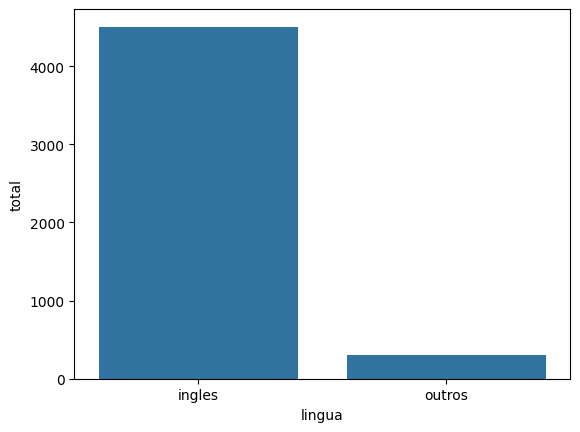

In [99]:
sns.barplot(x="lingua", y="total", data=dados)

Visualizando as outras categorias


([<matplotlib.patches.Wedge at 0x7ada808d9e40>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'ingles'),
  Text(1.0791697511565306, -0.2130555049482467, 'outros')])

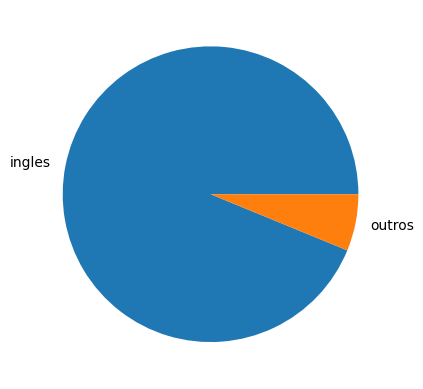

In [100]:

plt.pie(dados["total"], labels=dados["lingua"]) # neste caso, preferir usar o gráfico de barras, pois terá uma visualização melhor

In [106]:
total_de_linguas_de_outros_filmes = tmdb.query("original_language != 'en'").original_language.value_counts()
total_de_linguas_de_outros_filmes

,count
original_language,
fr,70
es,32
zh,27
de,27
hi,19
ja,16
it,14
cn,12
ko,11


<ipython-input-123-7f9a42ec74aa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles, palette=palette)
<ipython-input-123-7f9a42ec74aa>:5: UserWarning: 
The palette list has fewer values (7) than needed (36) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles, palette=palette)


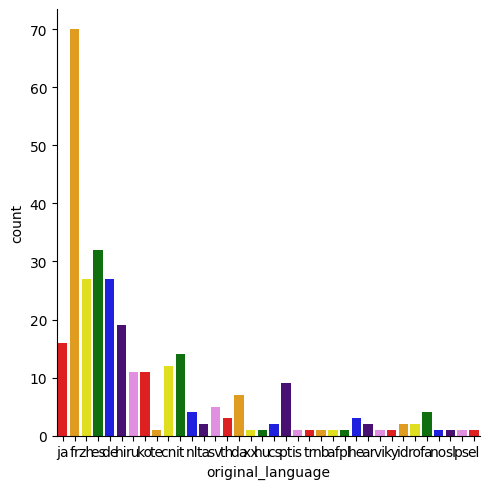

In [123]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
#palette = "viridis"  #cores
rainbow_colors = ["red", "orange", "yellow", "green", "blue", "indigo", "violet"]
palette = rainbow_colors
sns.catplot(x="original_language", kind="count", data=filmes_sem_lingua_original_em_ingles, palette=palette)